# SPOTIFY SONG RECOMMENDATION

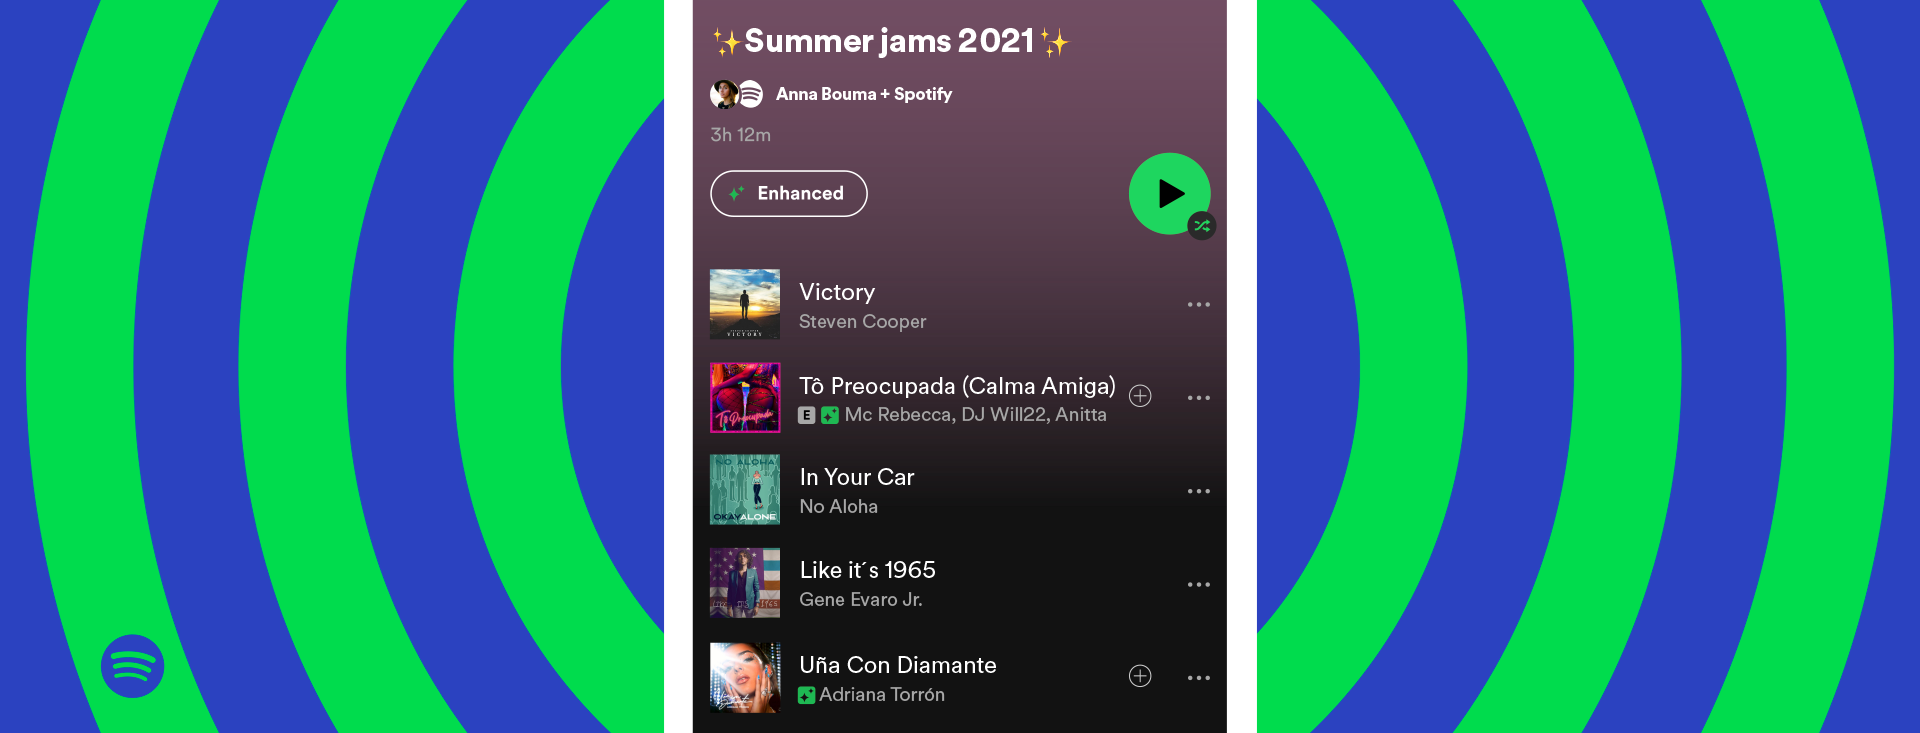

# Table of Contents:
* [Introduction](#1)
* [Importing the Dataset](#2)
* [Data Visualization](#3)
* [Song Recommendation System](#4)
* [Data Preproprocessing](#5)
* [CONCLUSION](#6)


<a id="1"></a> <br>
# Introduction
> Recommender systems are machine learning systems that help users in guiding them towards the most likely product they might purchase or search for.

*The dataset contains Top 50 songs from Spotify in the year 2019*
* We will use Data Visualization techniques to analyse the dataset and view the top artists, songs and genres
* Use a **Recommender System** to suggest songs according to users' likes

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


<a id="2"></a> <br>
# Importing the Dataset

In [2]:
#Reading the songs
#using encoder to avoid utf-8 error

df = pd.read_csv('../input/top50spotify2019/top50.csv',sep=',', encoding='ISO-8859-1')

In [3]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


<a id="3"></a> <br>
# Data Visualization
> **Bar Chart of Top 5 Genres**

In [4]:
famous_genres = df['Genre'].value_counts().head(5).to_frame().reset_index()
famous_genres.columns = ['Genre','Count']
famous_genres_list = list(famous_genres['Genre'])
# Visualize
px.bar(famous_genres, 
       x = 'Genre', 
       y = 'Count', 
       title = 'Top 5 Genres',
       template = 'plotly_white')

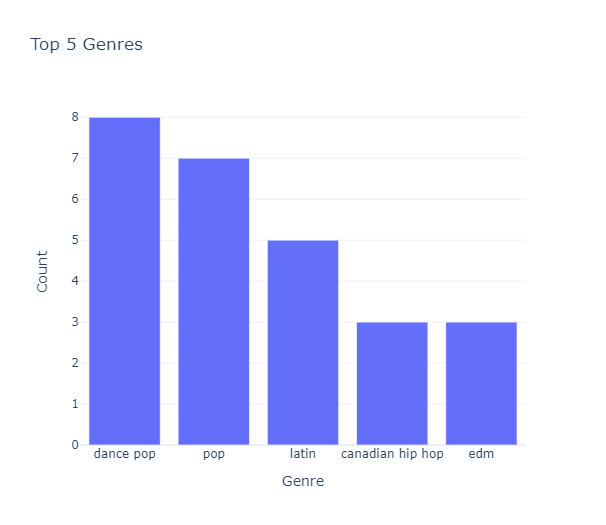

In [5]:
#Renaming the index column
df=df.rename(columns={"Artist.Name":"artists","Track.Name": "Title"})

> **Column chart to see top 5 Artists**

In [6]:
# Prepare data
famous_artist = df['artists'].value_counts().head(5).to_frame().reset_index()
famous_artist.columns = ['artists','Count']
# Visualize
px.bar(famous_artist.sort_values('Count'), 
       x = 'Count', 
       y = 'artists', 
       title = 'Top 5 Artist',
       template = 'plotly_white',
       orientation = 'h')

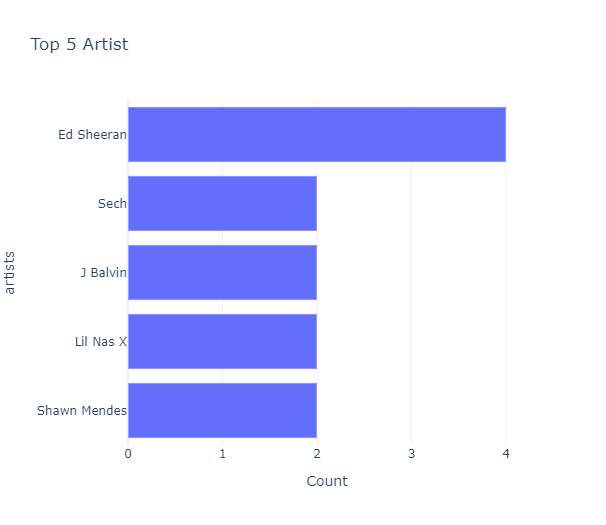

> **Box Plot to see Artist Popularity**

In [7]:
# Average Popularity of a particular genre over the years
famous_artist_list = list(famous_artist['artists'])

top_5_artist = famous_artist_list
df_top_artist = df.loc[df['artists'].isin(top_5_artist)]
px.box(df_top_artist,
       x = 'artists',
       y = 'Popularity',
       hover_name = 'Title',
       title = 'Artist Songs Popularity Distribution',
       template = 'plotly_white',
       points = 'all')

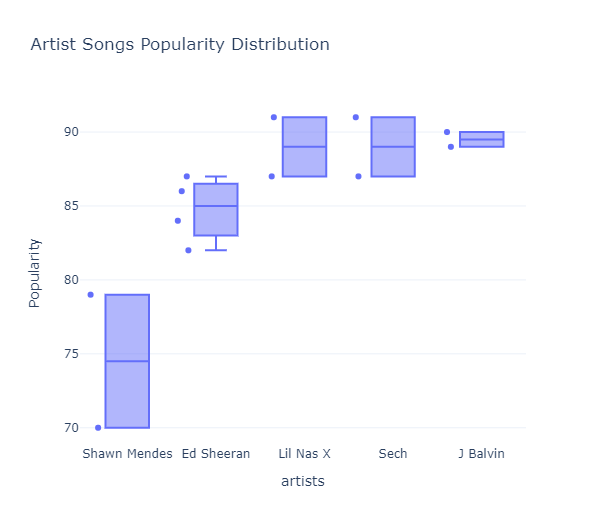

Among all the songs, **Panini by Lil Nas X and Otro Trago by Sech have the highest popularity**.

**Corelation between Popularity and Beats per Minute**

In [8]:
px.scatter(df_top_artist,
           x = 'Popularity',
           y = 'Beats.Per.Minute',
           color = 'Genre')

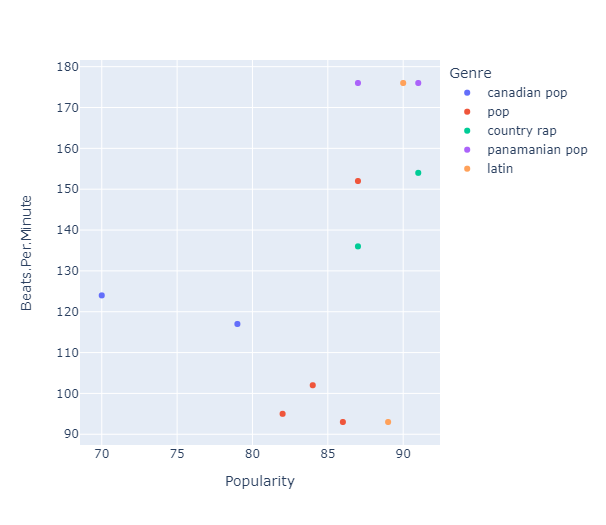

**Scatter matrix to see a correlation for all variables we want in the form of a scatter plot**

In [9]:
cols = df_top_artist.select_dtypes(include=['float', 'int']).columns.tolist()[1:]
px.scatter_matrix(df_top_artist, 
dimensions = cols,width=1400 ,height=1200, color = df_top_artist['Genre'])

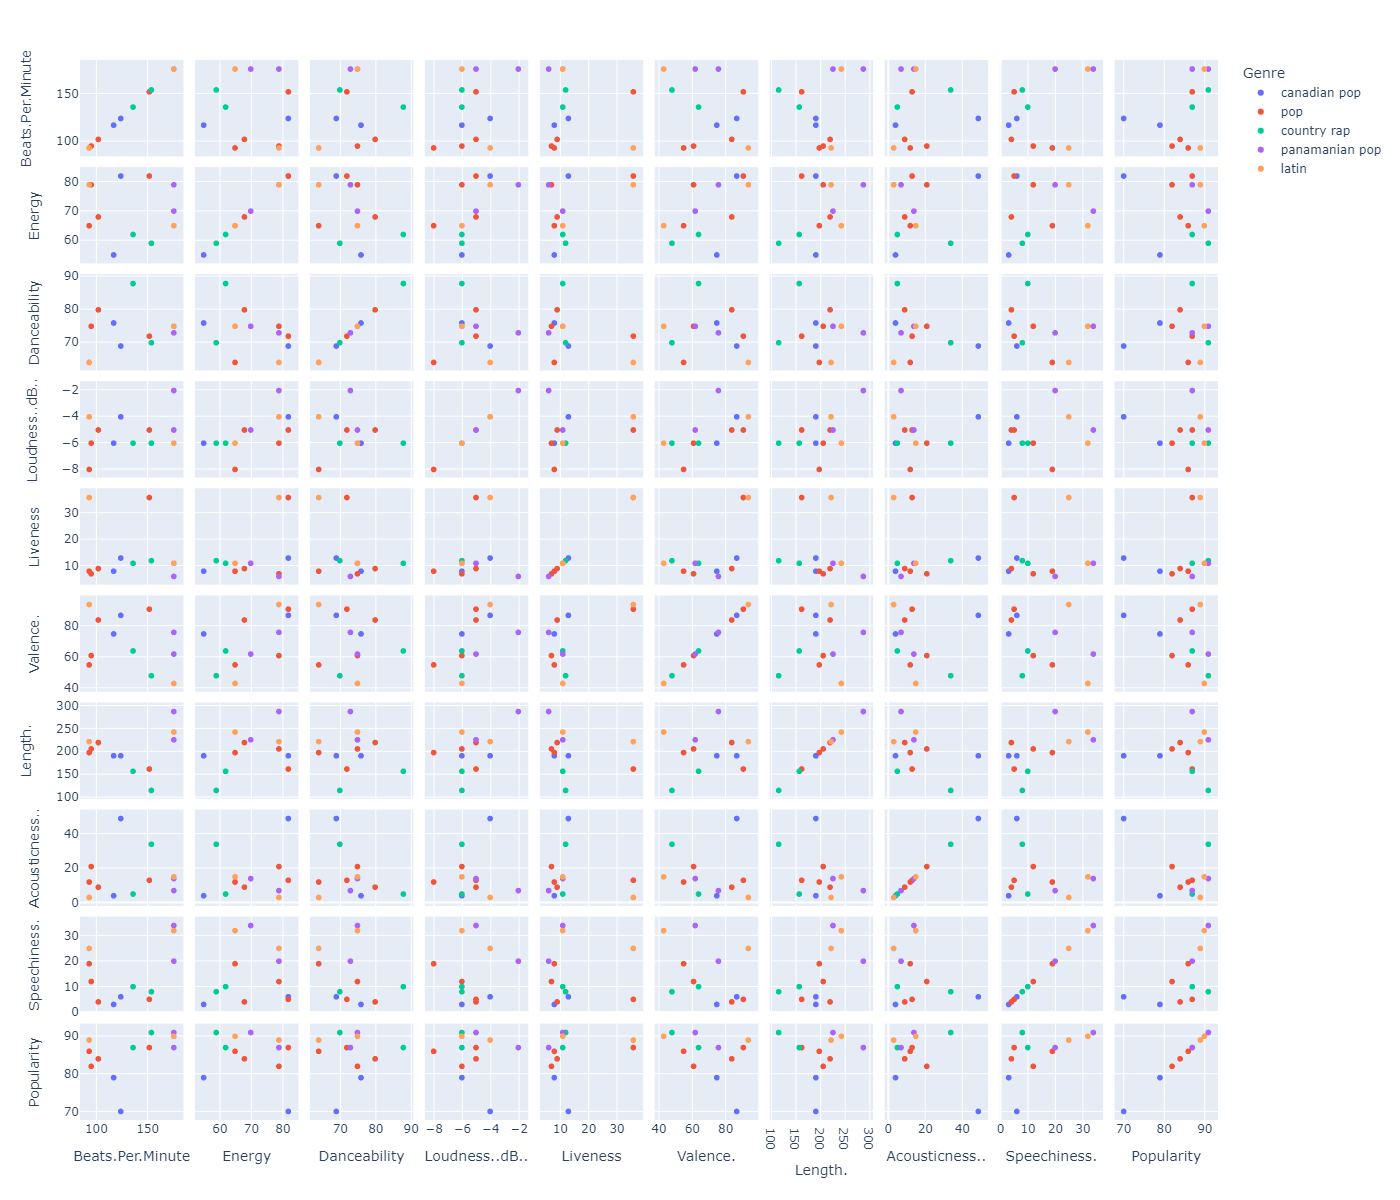

<a id="4"></a> <br>
# **Song Recommendation System**

In [10]:
#Reading the songs ,
songs = pd.read_csv('../input/top50spotify2019/top50.csv',sep=',', encoding='ISO-8859-1', usecols=['Unnamed: 0','Track.Name', 'Artist.Name','Genre'])

In [11]:
songs.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre
0,1,Señorita,Shawn Mendes,canadian pop
1,2,China,Anuel AA,reggaeton flow
2,3,boyfriend (with Social House),Ariana Grande,dance pop
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap


In [12]:
#Renaming the index column
songs=songs.rename(columns={"Unnamed: 0":"Index"})

In [13]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Index        50 non-null     int64 
 1   Track.Name   50 non-null     object
 2   Artist.Name  50 non-null     object
 3   Genre        50 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


<a id="5"></a> <br>
# Data Preproprocessing
> using a loop to replace any rows having NaN values with a space/empty string, so it does not generate an error while running the code. 

In [14]:
features = ['Track.Name', 'Artist.Name', 'Genre']
for feature in features:
    songs[feature] = songs[feature].fillna('')

> Adding a new column, combined_features to our existing dataframe (songs) and applying the above function to each row (axis = 1).

In [15]:
def combined_features(row):
    return row['Track.Name']+" "+row['Artist.Name']+" "+row['Genre']
songs["combined_features"] = songs.apply(combined_features, axis =1)

In [16]:
#Renaming the Track.Name and Artist.Name 
songs=songs.rename(columns={"Track.Name":"Title","Artist.Name":"Artist"})

In [17]:
songs.head()

,Index,Title,Artist,Genre,combined_features
0,1,Señorita,Shawn Mendes,canadian pop,Señorita Shawn Mendes canadian pop
1,2,China,Anuel AA,reggaeton flow,China Anuel AA reggaeton flow
2,3,boyfriend (with Social House),Ariana Grande,dance pop,boyfriend (with Social House) Ariana Grande da...
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,Beautiful People (feat. Khalid) Ed Sheeran pop
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,Goodbyes (Feat. Young Thug) Post Malone dfw rap


# Recommendation based on Title and Genre
> We import Scikit-learn’s CountVectorizer and TfidfVectorizer to convert a collection of text documents to a vector of term/token counts.

In [18]:
#Using CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(songs["combined_features"])
print("Count Matrix:", count_matrix.toarray())

Count Matrix: [[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


**Finding out the Similarity between songs using Cosine Similarity**
> Cosine similarity is a metric used to measure how similar two items are. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The output value ranges from 0–1 where 0 means no similarity, where as 1 means that both the items are 100% similar

In [19]:
#Using sklearns' cosine_similarity to find the cos θ for the two vectors in the count matrix
cosine_sim = cosine_similarity(count_matrix)

> The cosine_sim matrix is a numpy array with calculated cosine similarity between each songs
# Content based filtering
> We need to know the users’ likes in order to predict a similar item.

In [20]:
song_user_likes = "Goodbyes (Feat. Young Thug)"
def get_index_from_title(Title):
    return songs[songs.Title == Title]["Index"].values[0]
song_index = get_index_from_title(song_user_likes)

 **Generating list of similar songs**
> The enumerate() method acts as a counter to the iterable list cosine_sim and returns it in a form of a list similar_songs with the similarity score of each index

In [21]:
similar_songs = list(enumerate(cosine_sim[song_index]))

In [22]:
#sorting the songs in descending order
sorted_similar_songs = sorted(similar_songs, key=lambda x:x[1], reverse=True)

<a id="6"></a> <br>
# **CONCLUSION**
> # Printing the 5 most similar songs based on similarly liked songs and genres

In [23]:
def get_title_from_index(Index):
    return songs[songs.Index == Index]["Title"].values[0]
i=0
for song in sorted_similar_songs:
    print(get_title_from_index(song[0]))
    i=i+1
    if i>5:
        break

Goodbyes (Feat. Young Thug)
Otro Trago
boyfriend (with Social House)
Soltera - Remix
Call You Mine
China


***RESULT: Songs Recommended based on other similar songs user liked***

In [24]:
genre_user_likes = "pop"
def get_index_from_title(Genre):
    return songs[songs.Genre == Genre]["Index"].values[0]
song_index = get_index_from_title(genre_user_likes)

In [25]:
similar_songs = list(enumerate(cosine_sim[song_index]))

In [26]:
#sorting the songs in descending order
sorted_similar_songs = sorted(similar_songs, key=lambda x:x[1], reverse=True)

In [27]:
def get_title_from_index(Index):
    return songs[songs.Index == Index]["Title"].values[0]
i=0
for song in sorted_similar_songs:
    print(get_title_from_index(song[0]))
    i=i+1
    if i>5:
        break

Beautiful People (feat. Khalid)
LA CANCIÓN
0.958333333333333
Piece Of Your Heart
boyfriend (with Social House)
How Do You Sleep?


***RESULT: Songs from similar Genre Recommended based on Genres the user liked***